In [1]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate

from ipynb.fs.full.Peaks import slicer

In [2]:
EX4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V4\\test4_2.csv")
EX19 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V4\\test19_1.csv")
EX20 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V4\\test20_1.csv")
EX5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V4\\test5_2.csv")

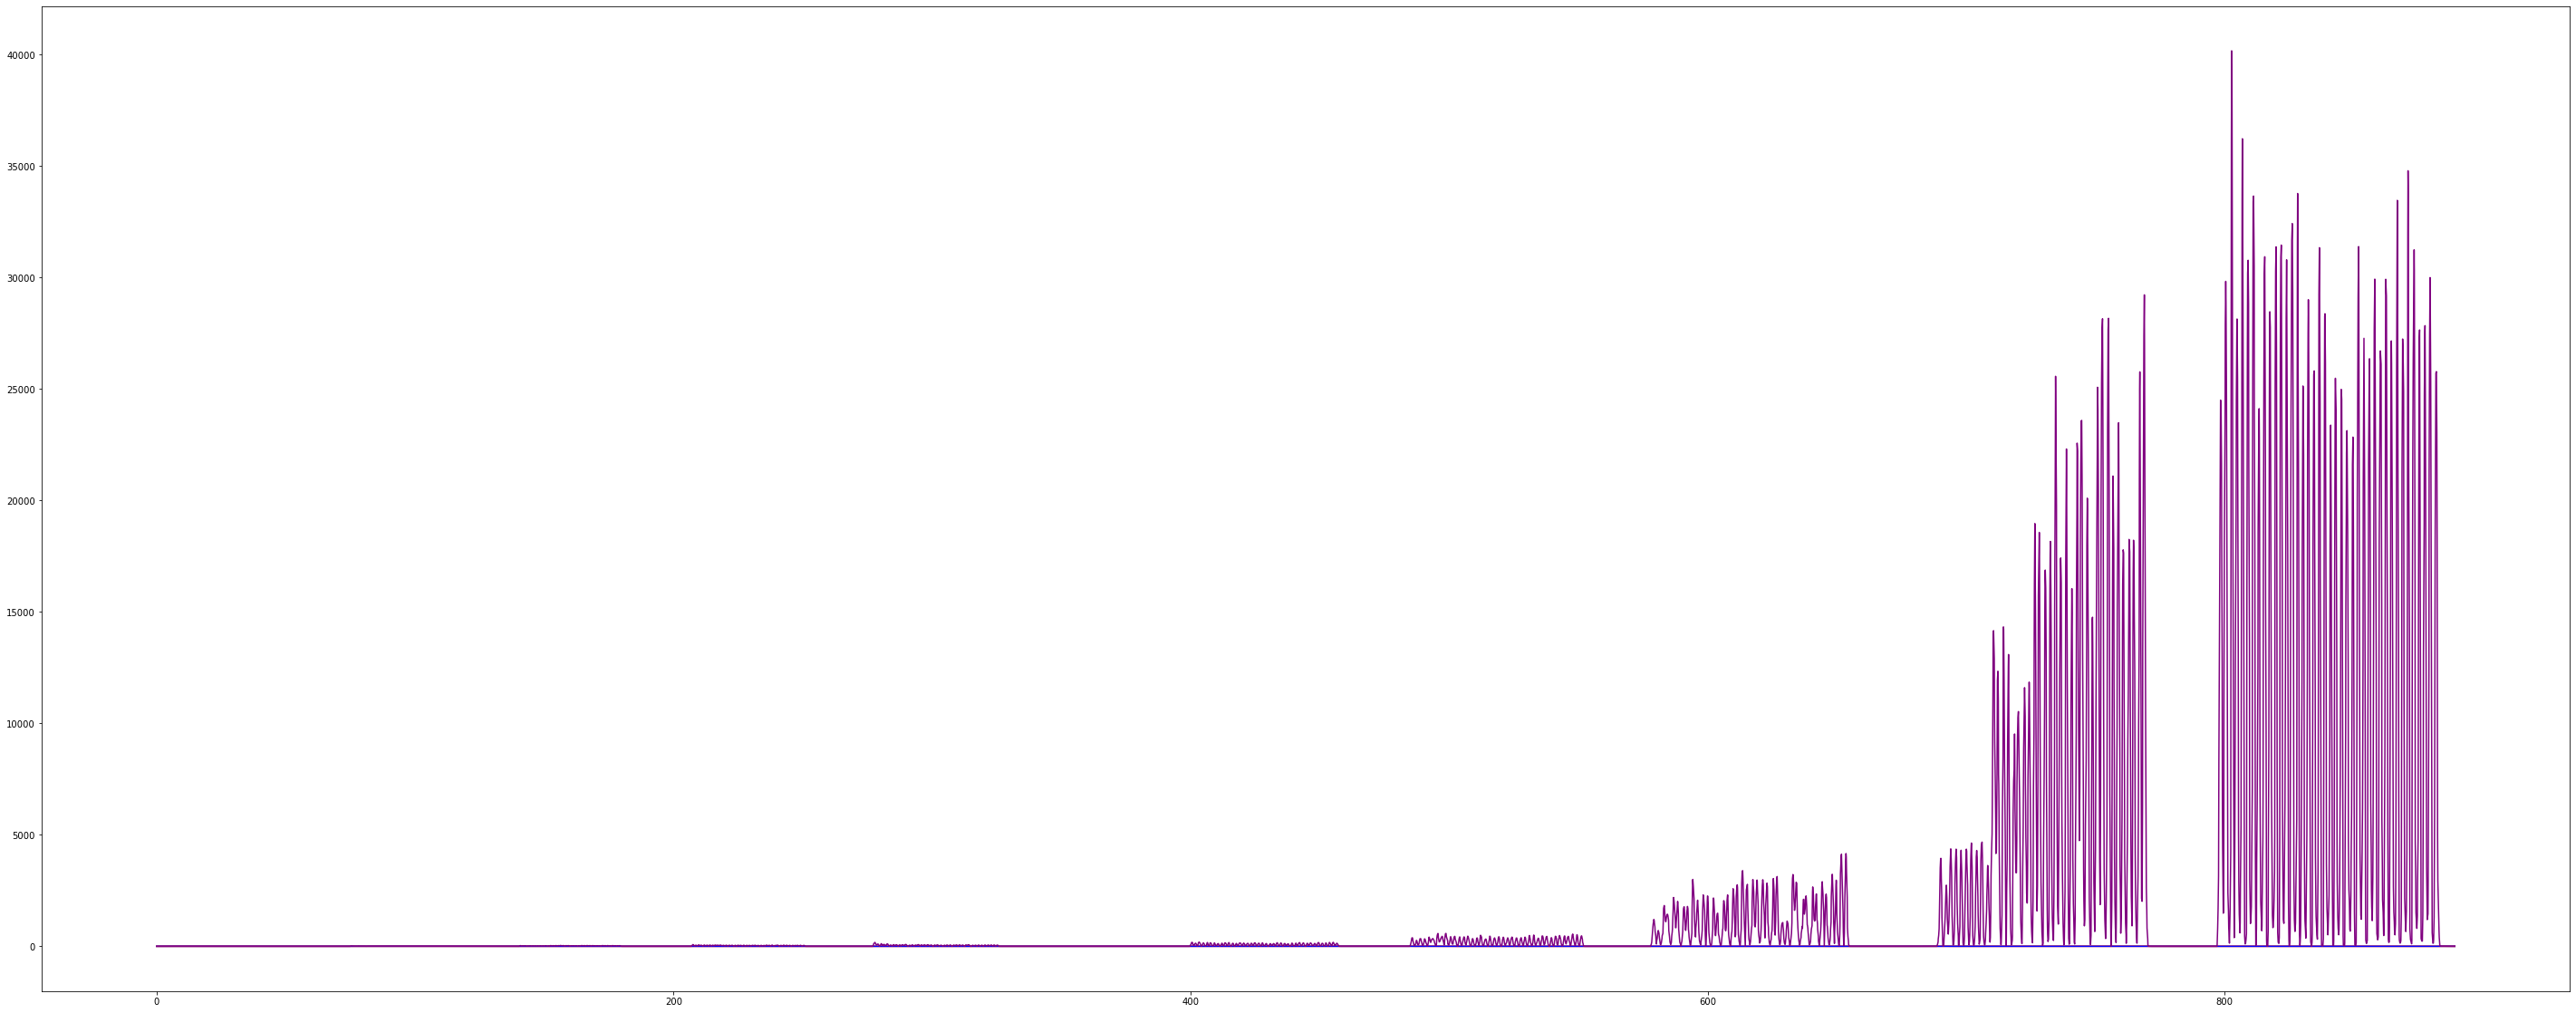

In [3]:
plt.figure(figsize=(50, 20))

       
plt.plot(EX4["Unnamed: 0"],EX4["s1_d"], color = 'brown', label = 'sesnor1')
plt.plot(EX4["Unnamed: 0"],EX4["s2_d"], color = 'red', label = 'sesnor2')
plt.plot(EX4["Unnamed: 0"],EX4["s3_d"], color = 'blue', label = 'sesnor3')
plt.plot(EX4["Unnamed: 0"],EX4["s4_d"], color = 'purple', label = 'sesnor4')

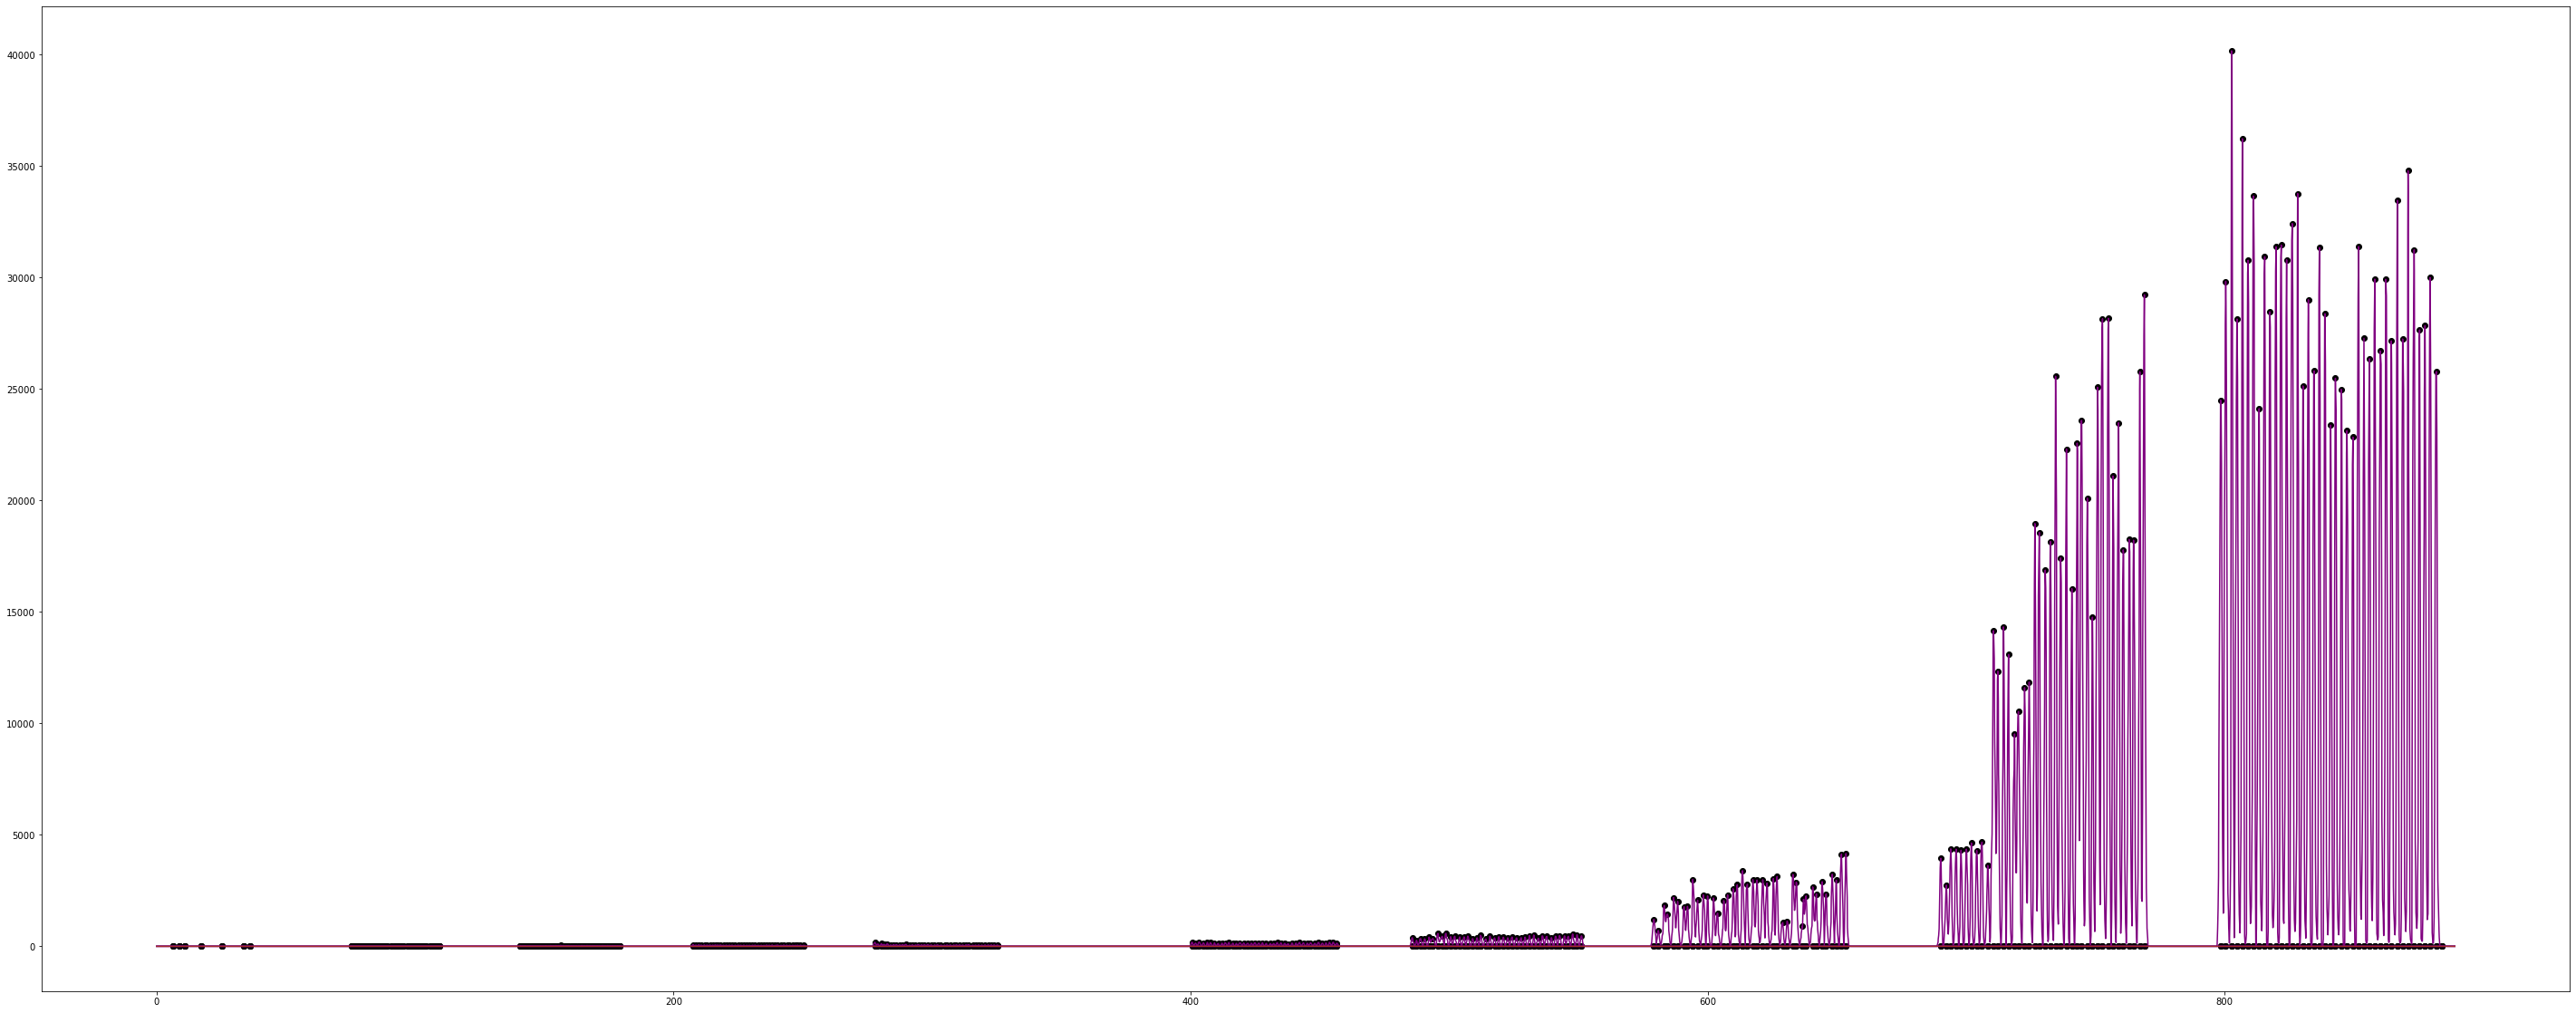

In [4]:
#finding the peaks
plt.figure(figsize=(50, 20))
Ex_t = EX4["Unnamed: 0"]
EX4_s1 = EX4["s1_d"]
EX4_s2 = EX4["s2_d"]
EX4_s3 = EX4["s3_d"]
EX4_s4 = EX4["s4_d"]

pidx_EX4_s4, _ = find_peaks(EX4_s4,prominence = 0.7 )

peaks_EX4_s4 = EX4_s4[pidx_EX4_s4]
peaks_EX4_s3 = EX4_s3[pidx_EX4_s4]
peaks_EX4_s2 = EX4_s2[pidx_EX4_s4]
peaks_EX4_s1 = EX4_s1[pidx_EX4_s4]
peaks_EX_t = Ex_t[pidx_EX4_s4]


plt.plot(Ex_t,EX4["s4_d"], color = 'purple', label = 'sesnor4')
plt.scatter(peaks_EX_t,peaks_EX4_s4,color = 'black')
plt.plot(Ex_t,EX4["s2_d"], color = 'red', label = 'sesnor2')
plt.scatter(peaks_EX_t,peaks_EX4_s2,color = 'black')
plt.plot(Ex_t,EX4["s3_d"], color = 'blue', label = 'sesnor3')
plt.scatter(peaks_EX_t,peaks_EX4_s3,color = 'black')
plt.plot(Ex_t,EX4["s1_d"], color = 'brown', label = 'sesnor1')
plt.scatter(peaks_EX_t,peaks_EX4_s1,color = 'black')

In [5]:
content_Ex4 = {'R1':EX4_s1[pidx_EX4_s4],
              'R2':EX4_s2[pidx_EX4_s4],
              'R3':EX4_s3[pidx_EX4_s4],
              'R4':EX4_s4[pidx_EX4_s4], } 

df_Ex4 = pd.DataFrame(content_Ex4, columns = ['R1','R2','R3','R4'])

df_Ex4.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\Ex4.csv',index = False, header = True)

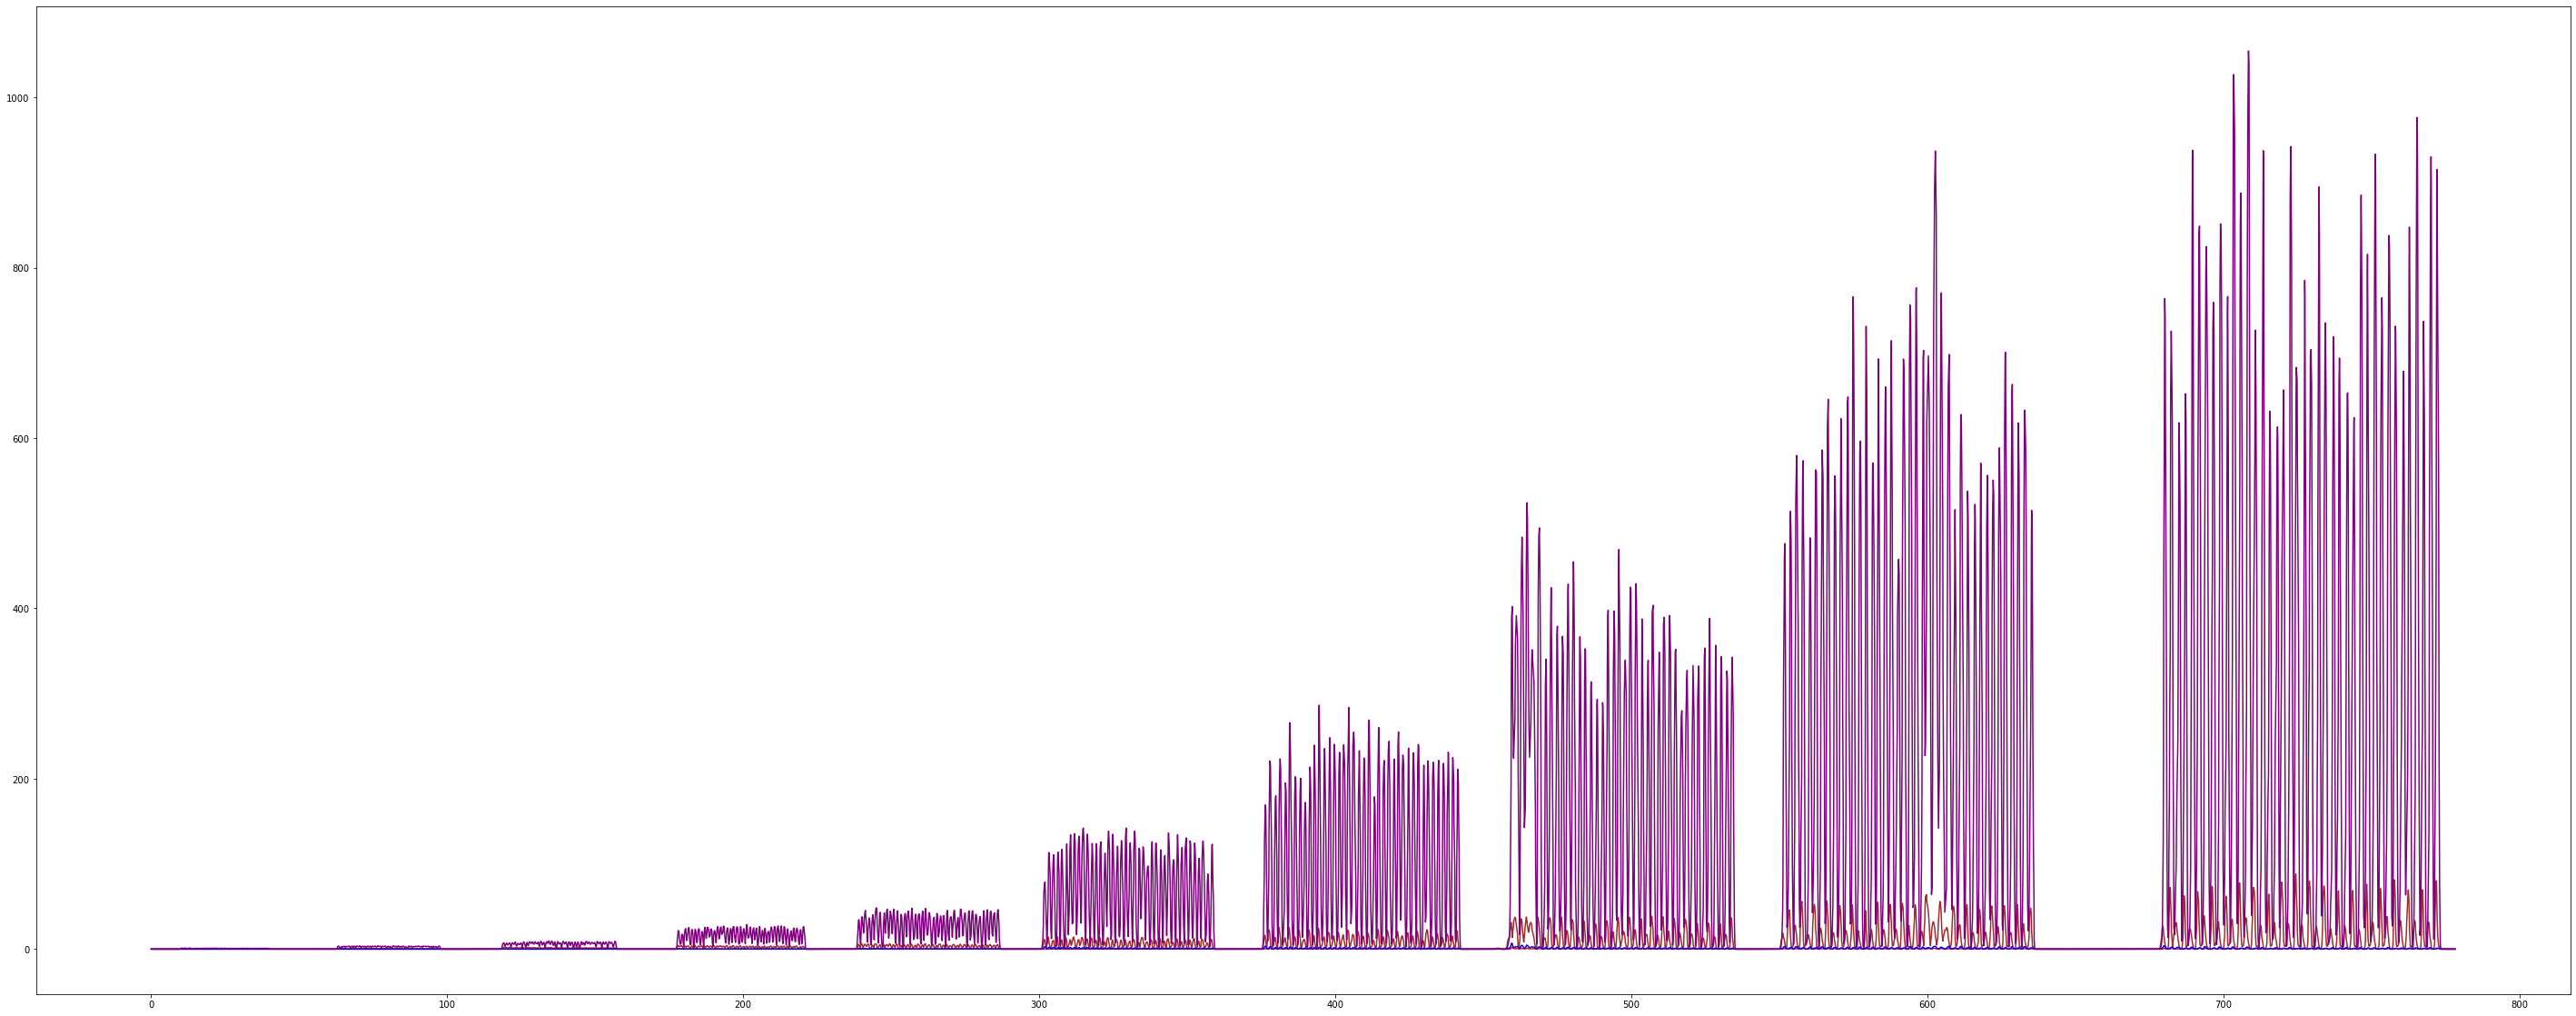

In [6]:
plt.figure(figsize=(50, 20))

       
plt.plot(EX19["Unnamed: 0"],EX19["s1_d"], color = 'brown', label = 'sesnor1')
plt.plot(EX19["Unnamed: 0"],EX19["s2_d"], color = 'red', label = 'sesnor2')
plt.plot(EX19["Unnamed: 0"],EX19["s3_d"], color = 'blue', label = 'sesnor3')
plt.plot(EX19["Unnamed: 0"],EX19["s4_d"], color = 'purple', label = 'sesnor4')

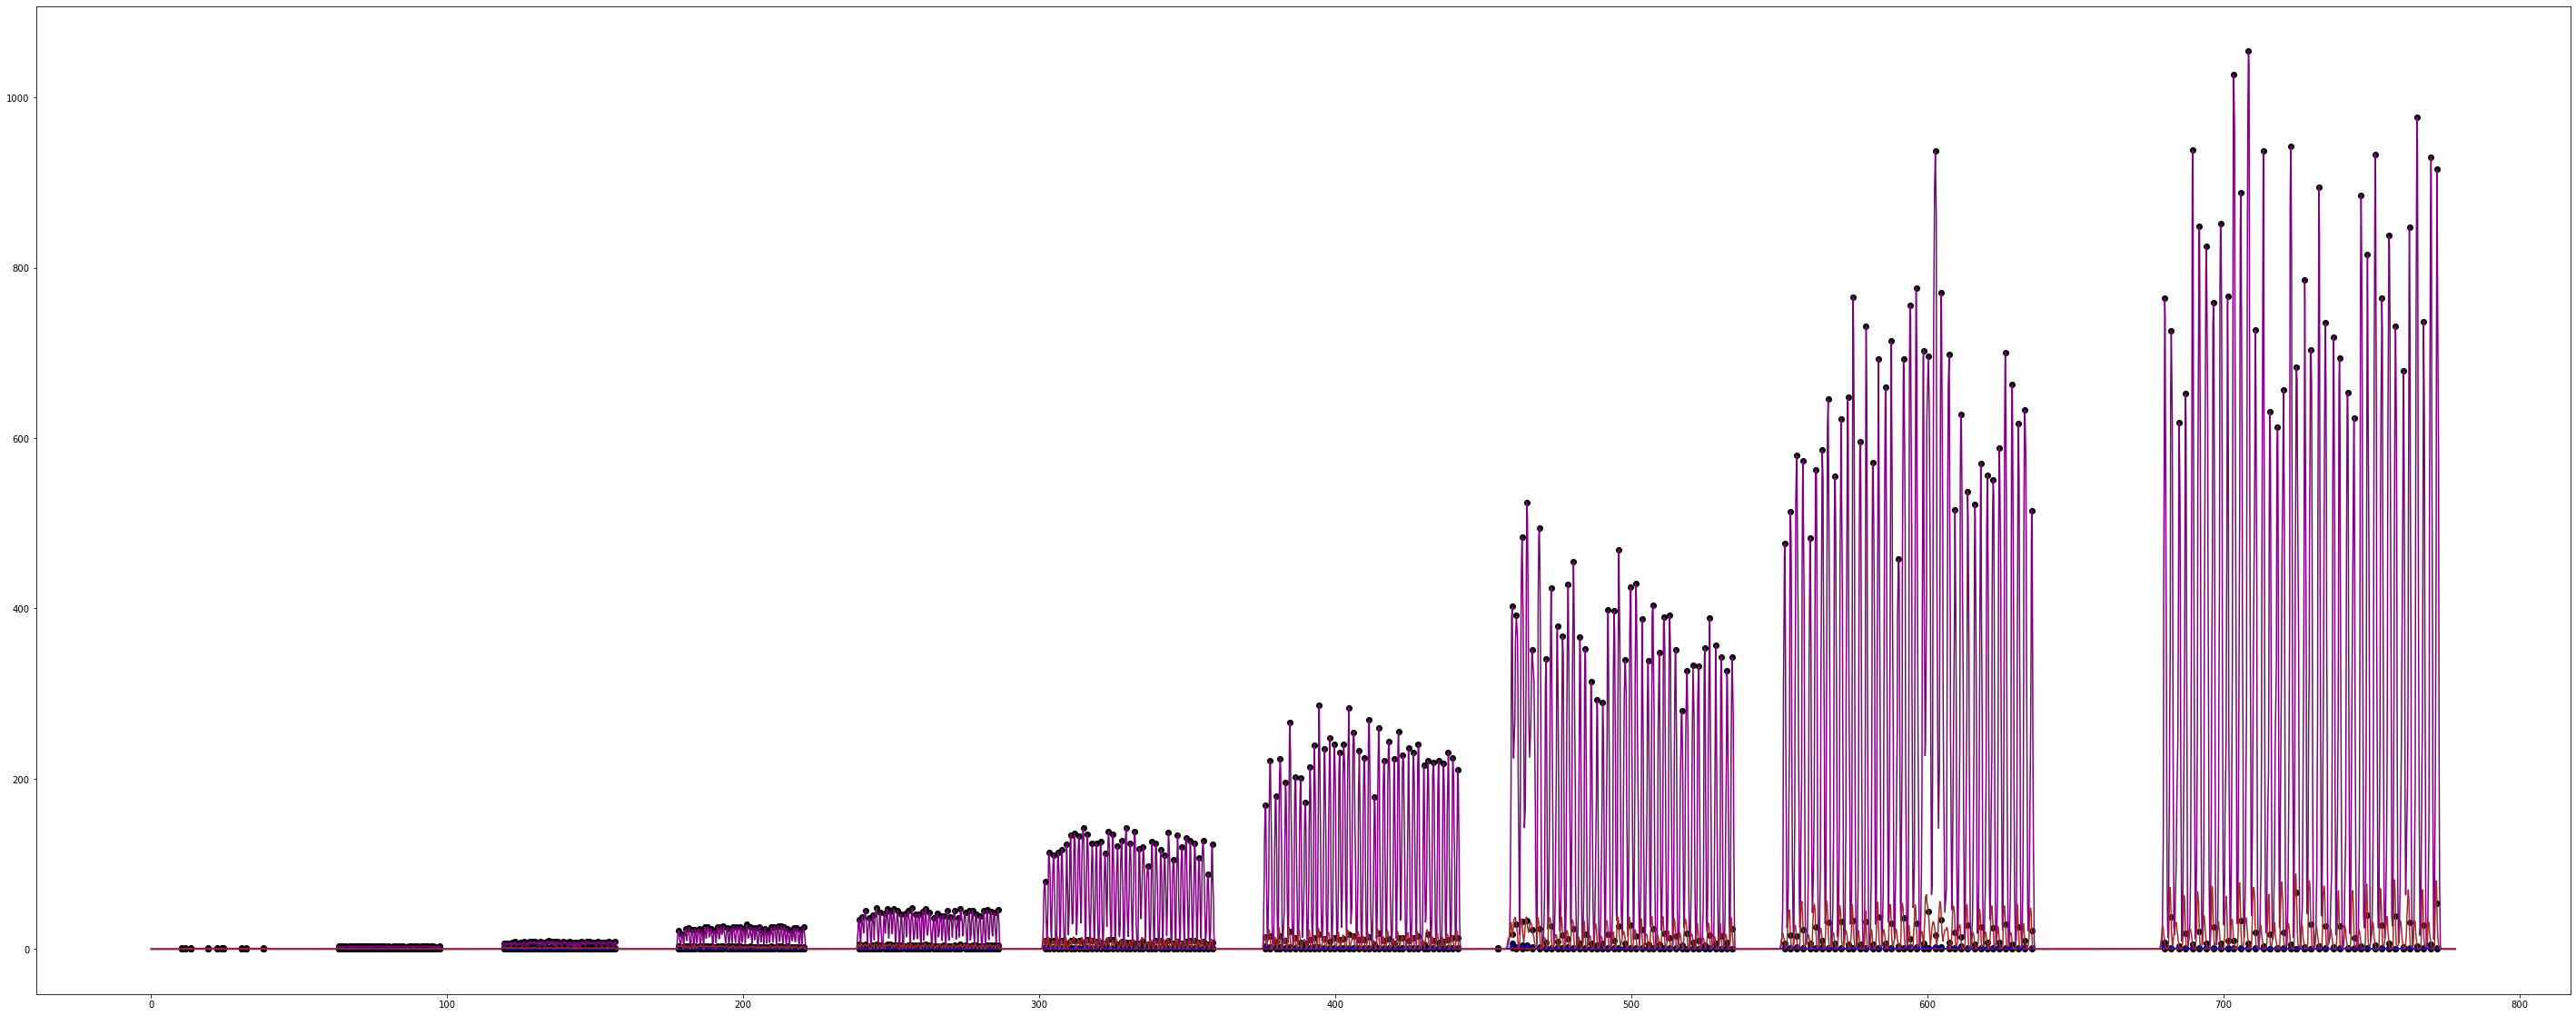

In [7]:
#finding the peaks
plt.figure(figsize=(50, 20))
Ex19_t = EX19["Unnamed: 0"]
EX19_s1 = EX19["s1_d"]
EX19_s2 = EX19["s2_d"]
EX19_s3 = EX19["s3_d"]
EX19_s4 = EX19["s4_d"]

pidx_EX19_s4, _ = find_peaks(EX19_s4,prominence = 0.22 )

peaks_EX19_s4 = EX19_s4[pidx_EX19_s4]
peaks_EX19_s3 = EX19_s3[pidx_EX19_s4]
peaks_EX19_s2 = EX19_s2[pidx_EX19_s4]
peaks_EX19_s1 = EX19_s1[pidx_EX19_s4]
peaks_EX19_t = Ex19_t[pidx_EX19_s4]


plt.plot(Ex19_t,EX19_s4, color = 'purple', label = 'sesnor4')
plt.scatter(peaks_EX19_t,peaks_EX19_s4,color = 'black')
plt.plot(Ex19_t,EX19["s2_d"], color = 'red', label = 'sesnor2')
plt.scatter(peaks_EX19_t,peaks_EX19_s2,color = 'black')
plt.plot(Ex19_t,EX19["s3_d"], color = 'blue', label = 'sesnor3')
plt.scatter(peaks_EX19_t,peaks_EX19_s3,color = 'black')
plt.plot(Ex19_t,EX19["s1_d"], color = 'brown', label = 'sesnor1')
plt.scatter(peaks_EX19_t,peaks_EX19_s1,color = 'black')

In [8]:
content_Ex19 = {'R1':EX19_s1[pidx_EX19_s4],
              'R2':EX19_s2[pidx_EX19_s4],
              'R3':EX19_s3[pidx_EX19_s4],
              'R4':EX19_s4[pidx_EX19_s4], } 

df_Ex19 = pd.DataFrame(content_Ex19, columns = ['R1','R2','R3','R4'])

df_Ex19.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\Ex19.csv',index = False, header = True)

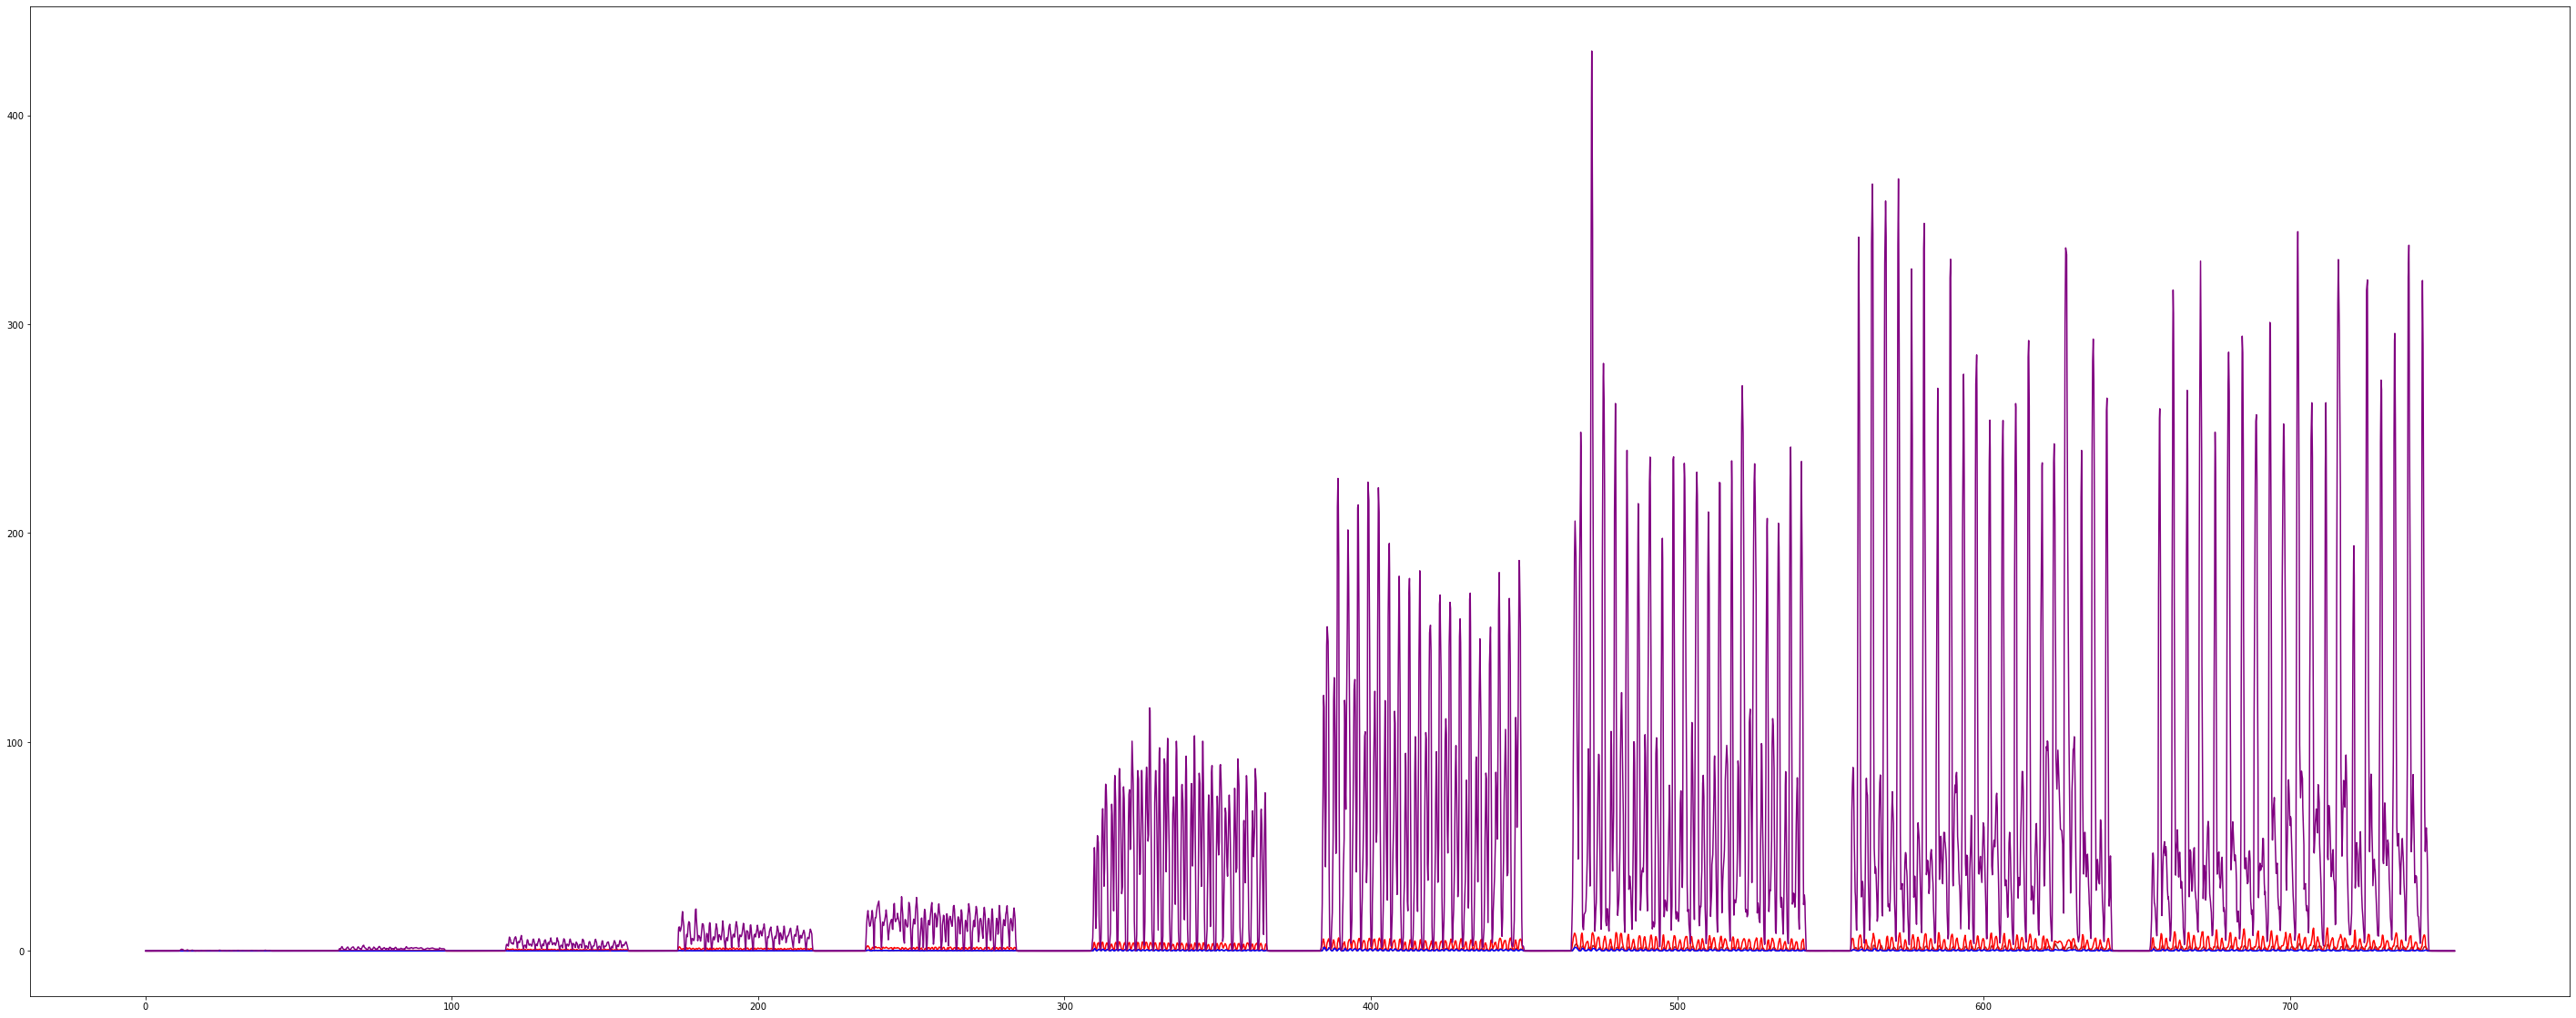

In [9]:
plt.figure(figsize=(50, 20))

       
plt.plot(EX20["Unnamed: 0"],EX20["s1_d"], color = 'brown', label = 'sesnor1')
plt.plot(EX20["Unnamed: 0"],EX20["s2_d"], color = 'red', label = 'sesnor2')
plt.plot(EX20["Unnamed: 0"],EX20["s3_d"], color = 'blue', label = 'sesnor3')
plt.plot(EX20["Unnamed: 0"],EX20["s4_d"], color = 'purple', label = 'sesnor4')

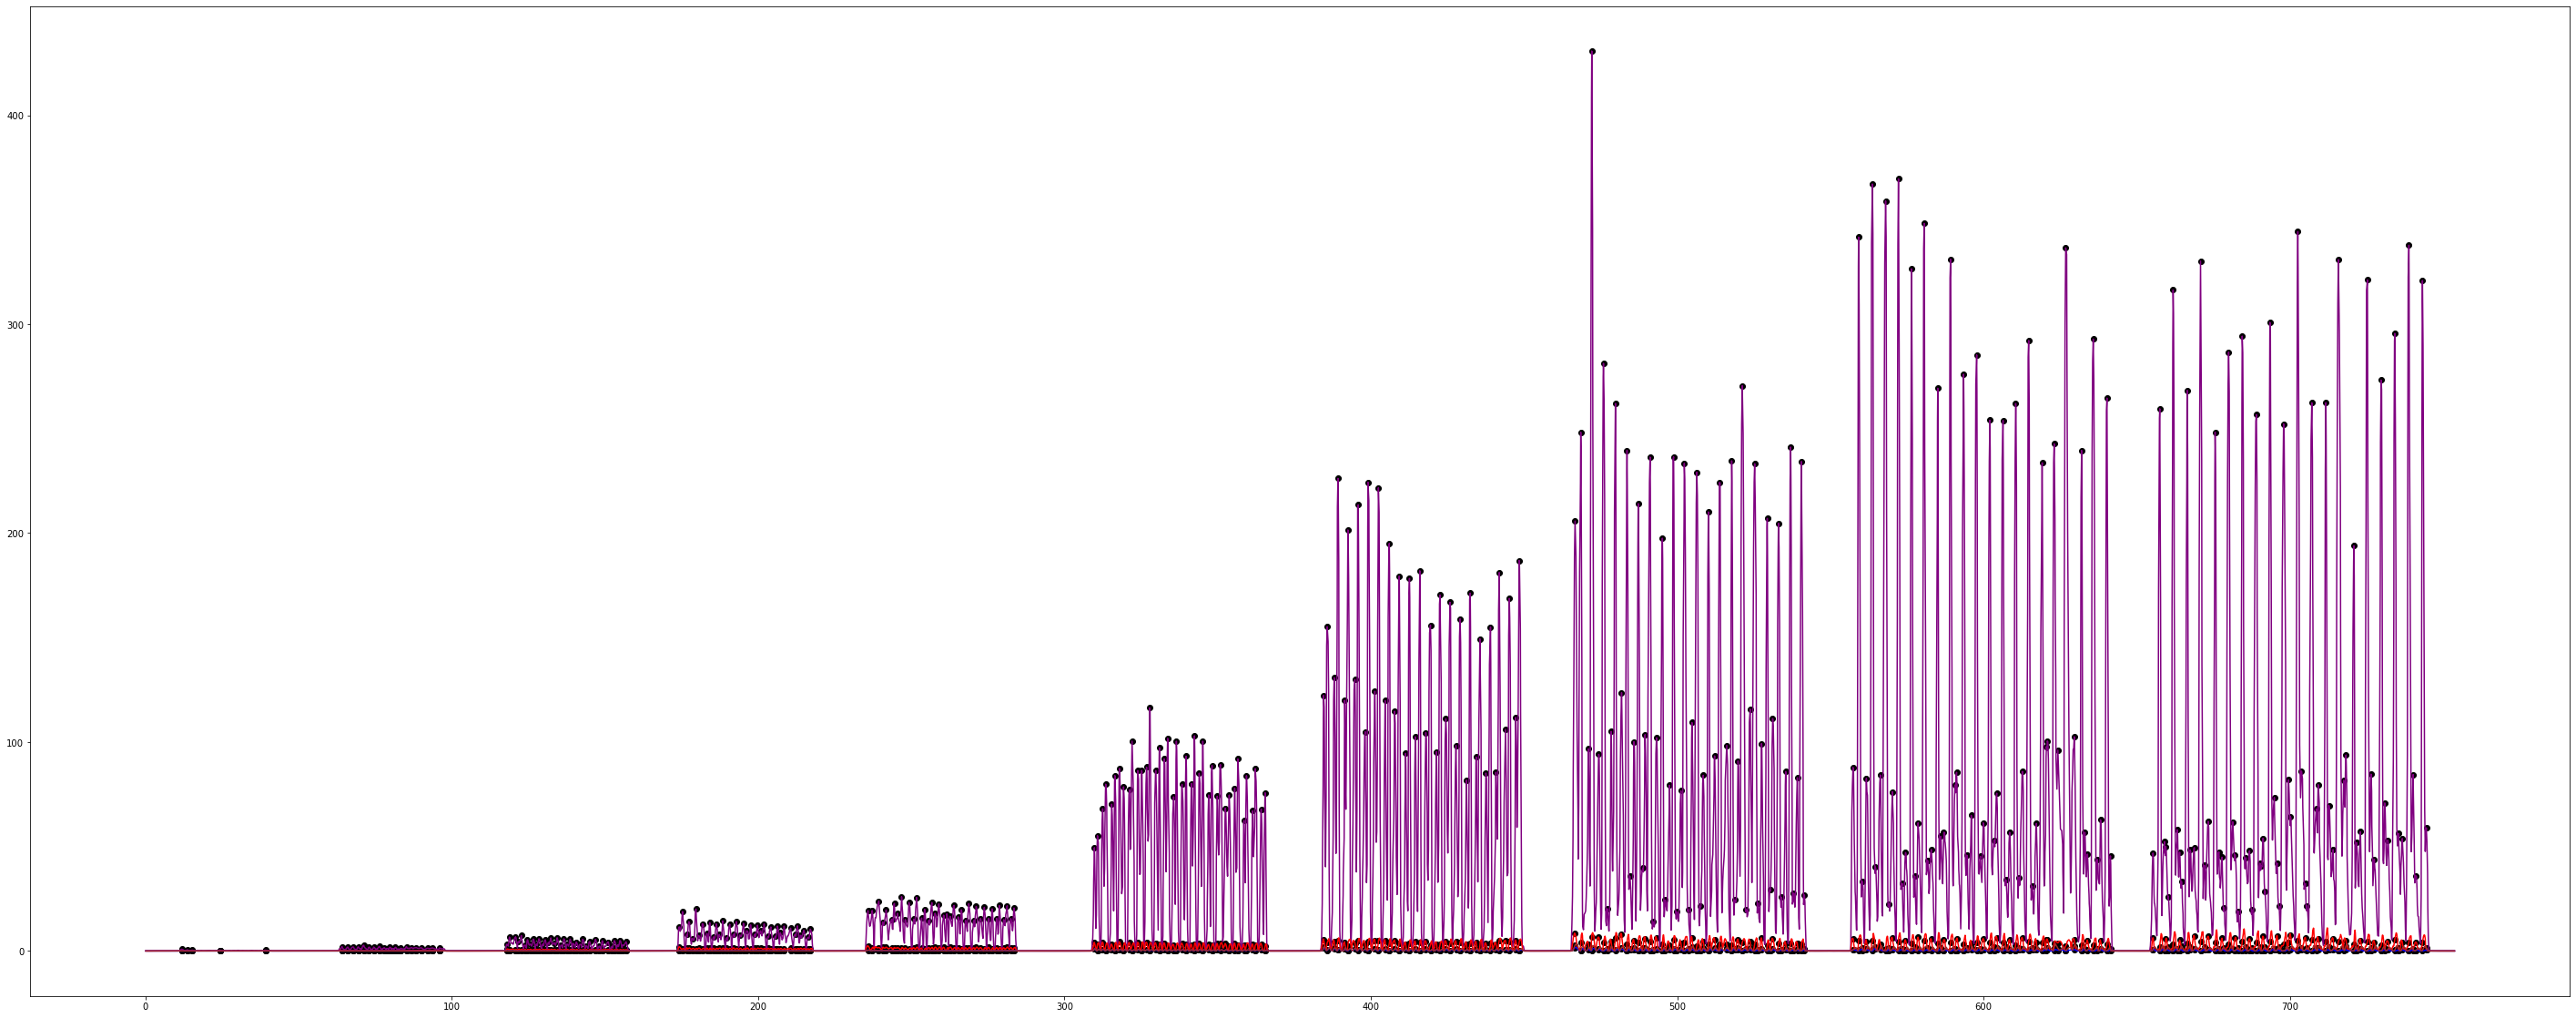

In [11]:
#finding the peaks
plt.figure(figsize=(50, 20))
Ex20_t = EX20["Unnamed: 0"]
EX20_s1 = EX20["s1_d"]
EX20_s2 = EX20["s2_d"]
EX20_s3 = EX20["s3_d"]
EX20_s4 = EX20["s4_d"]

pidx_EX20_s4, _ = find_peaks(EX20_s4,prominence = 0.23 )

peaks_EX20_s4 = EX20_s4[pidx_EX20_s4]
peaks_EX20_s3 = EX20_s3[pidx_EX20_s4]
peaks_EX20_s2 = EX20_s2[pidx_EX20_s4]
peaks_EX20_s1 = EX20_s1[pidx_EX20_s4]
peaks_EX20_t = Ex20_t[pidx_EX20_s4]


plt.plot(Ex20_t,EX20_s4, color = 'purple', label = 'sesnor4')
plt.scatter(peaks_EX20_t,peaks_EX20_s4,color = 'black')
plt.plot(Ex20_t,EX20["s2_d"], color = 'red', label = 'sesnor2')
plt.scatter(peaks_EX20_t,peaks_EX20_s2,color = 'black')
plt.plot(Ex20_t,EX20["s3_d"], color = 'blue', label = 'sesnor3')
plt.scatter(peaks_EX20_t,peaks_EX20_s3,color = 'black')
plt.plot(Ex20_t,EX20["s1_d"], color = 'brown', label = 'sesnor1')
plt.scatter(peaks_EX20_t,peaks_EX20_s1,color = 'black')

In [12]:
content_Ex20 = {'R1':EX20_s1[pidx_EX20_s4],
              'R2':EX20_s2[pidx_EX20_s4],
              'R3':EX20_s3[pidx_EX20_s4],
              'R4':EX20_s4[pidx_EX20_s4], } 

df_Ex20 = pd.DataFrame(content_Ex20, columns = ['R1','R2','R3','R4'])

df_Ex20.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\Ex20.csv',index = False, header = True)

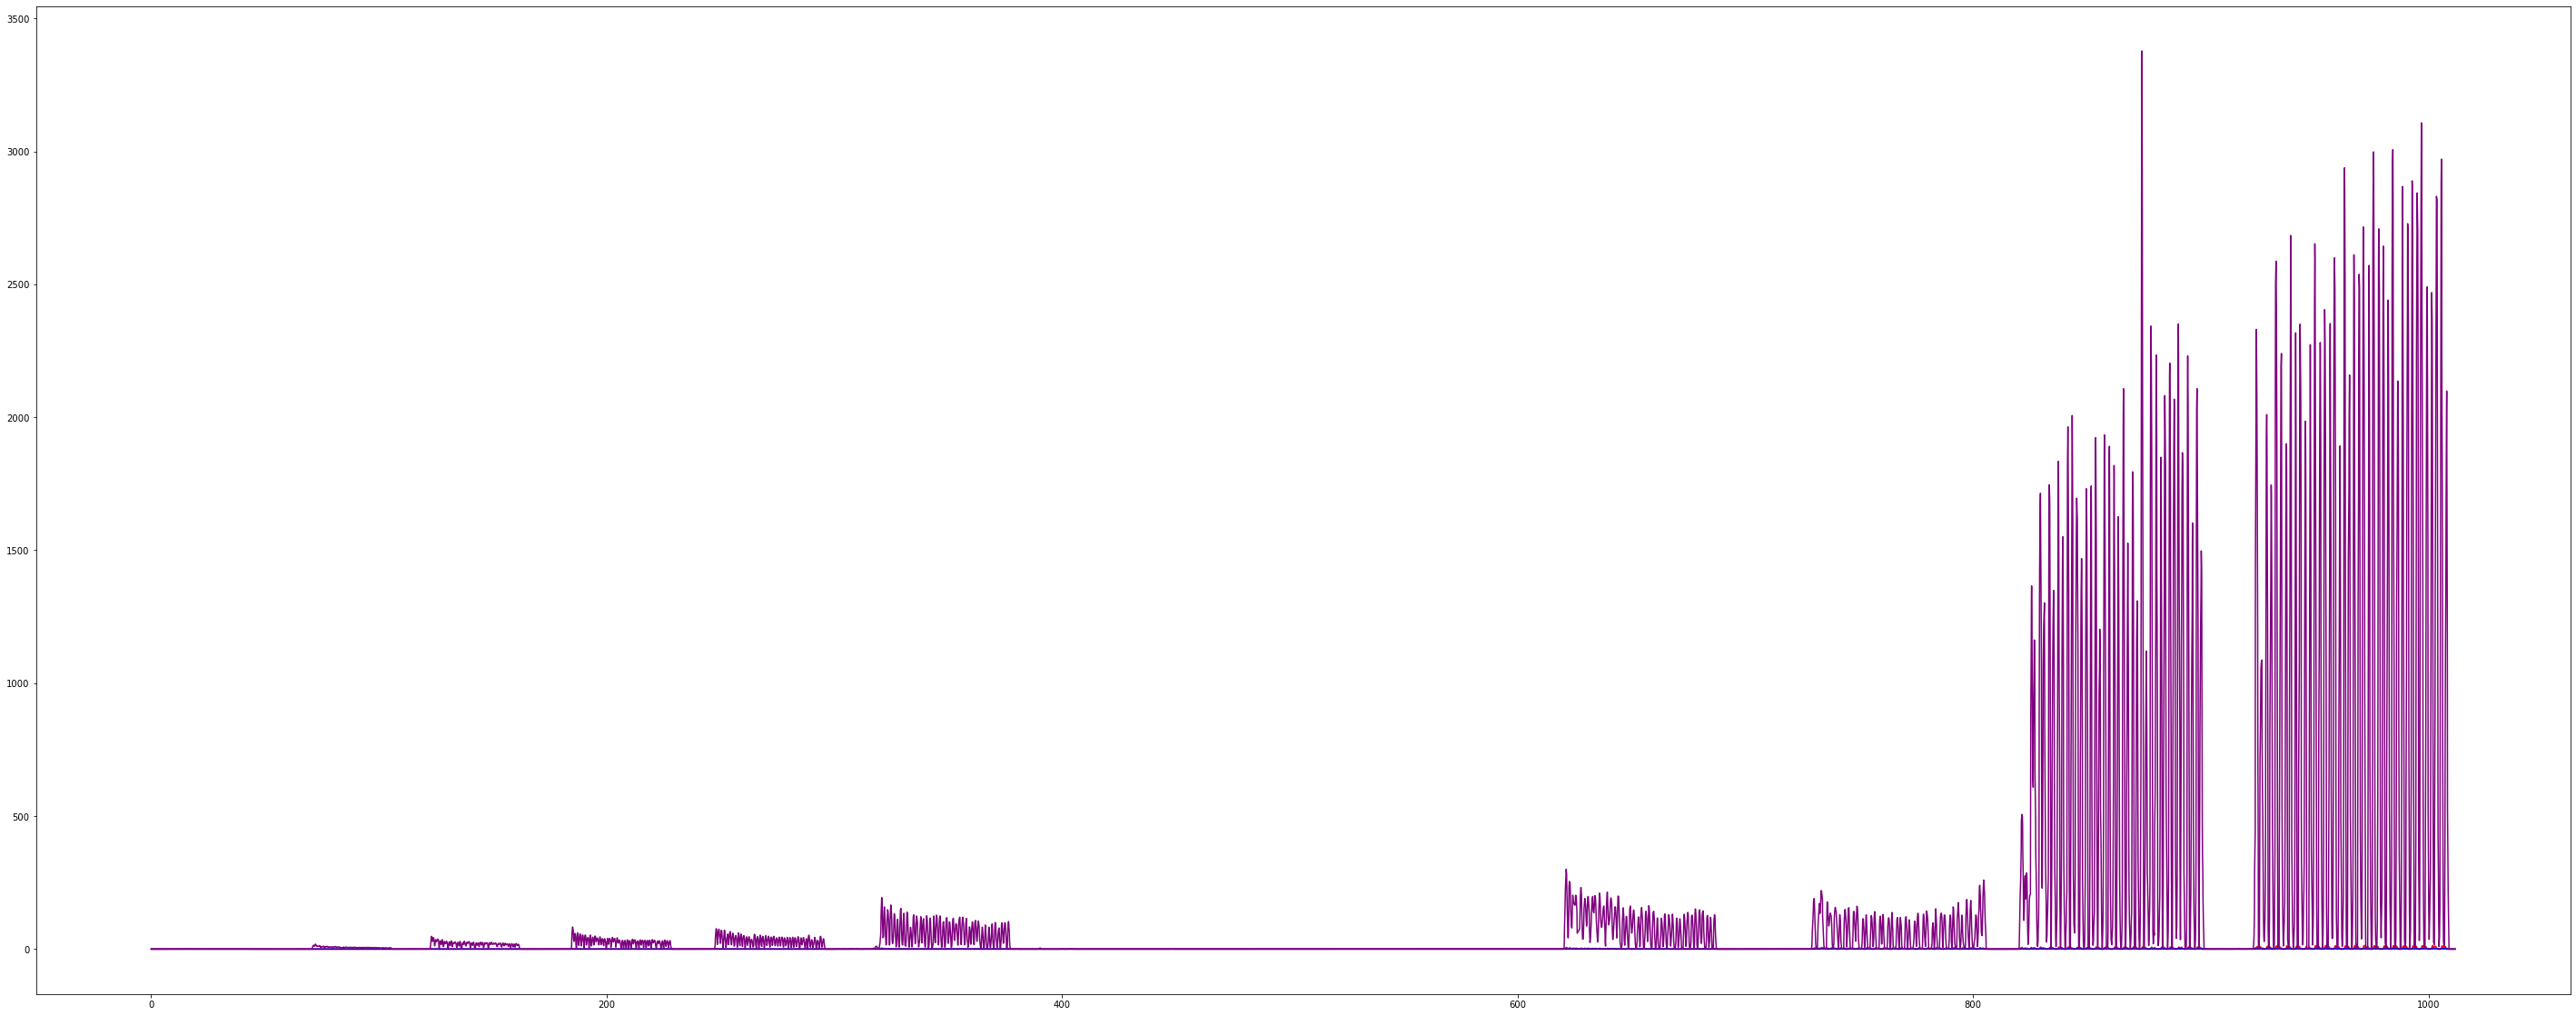

In [13]:
plt.figure(figsize=(50, 20))

       
plt.plot(EX5["Unnamed: 0"],EX5["s1_d"], color = 'brown', label = 'sesnor1')
plt.plot(EX5["Unnamed: 0"],EX5["s2_d"], color = 'red', label = 'sesnor2')
plt.plot(EX5["Unnamed: 0"],EX5["s3_d"], color = 'blue', label = 'sesnor3')
plt.plot(EX5["Unnamed: 0"],EX5["s4_d"], color = 'purple', label = 'sesnor4')

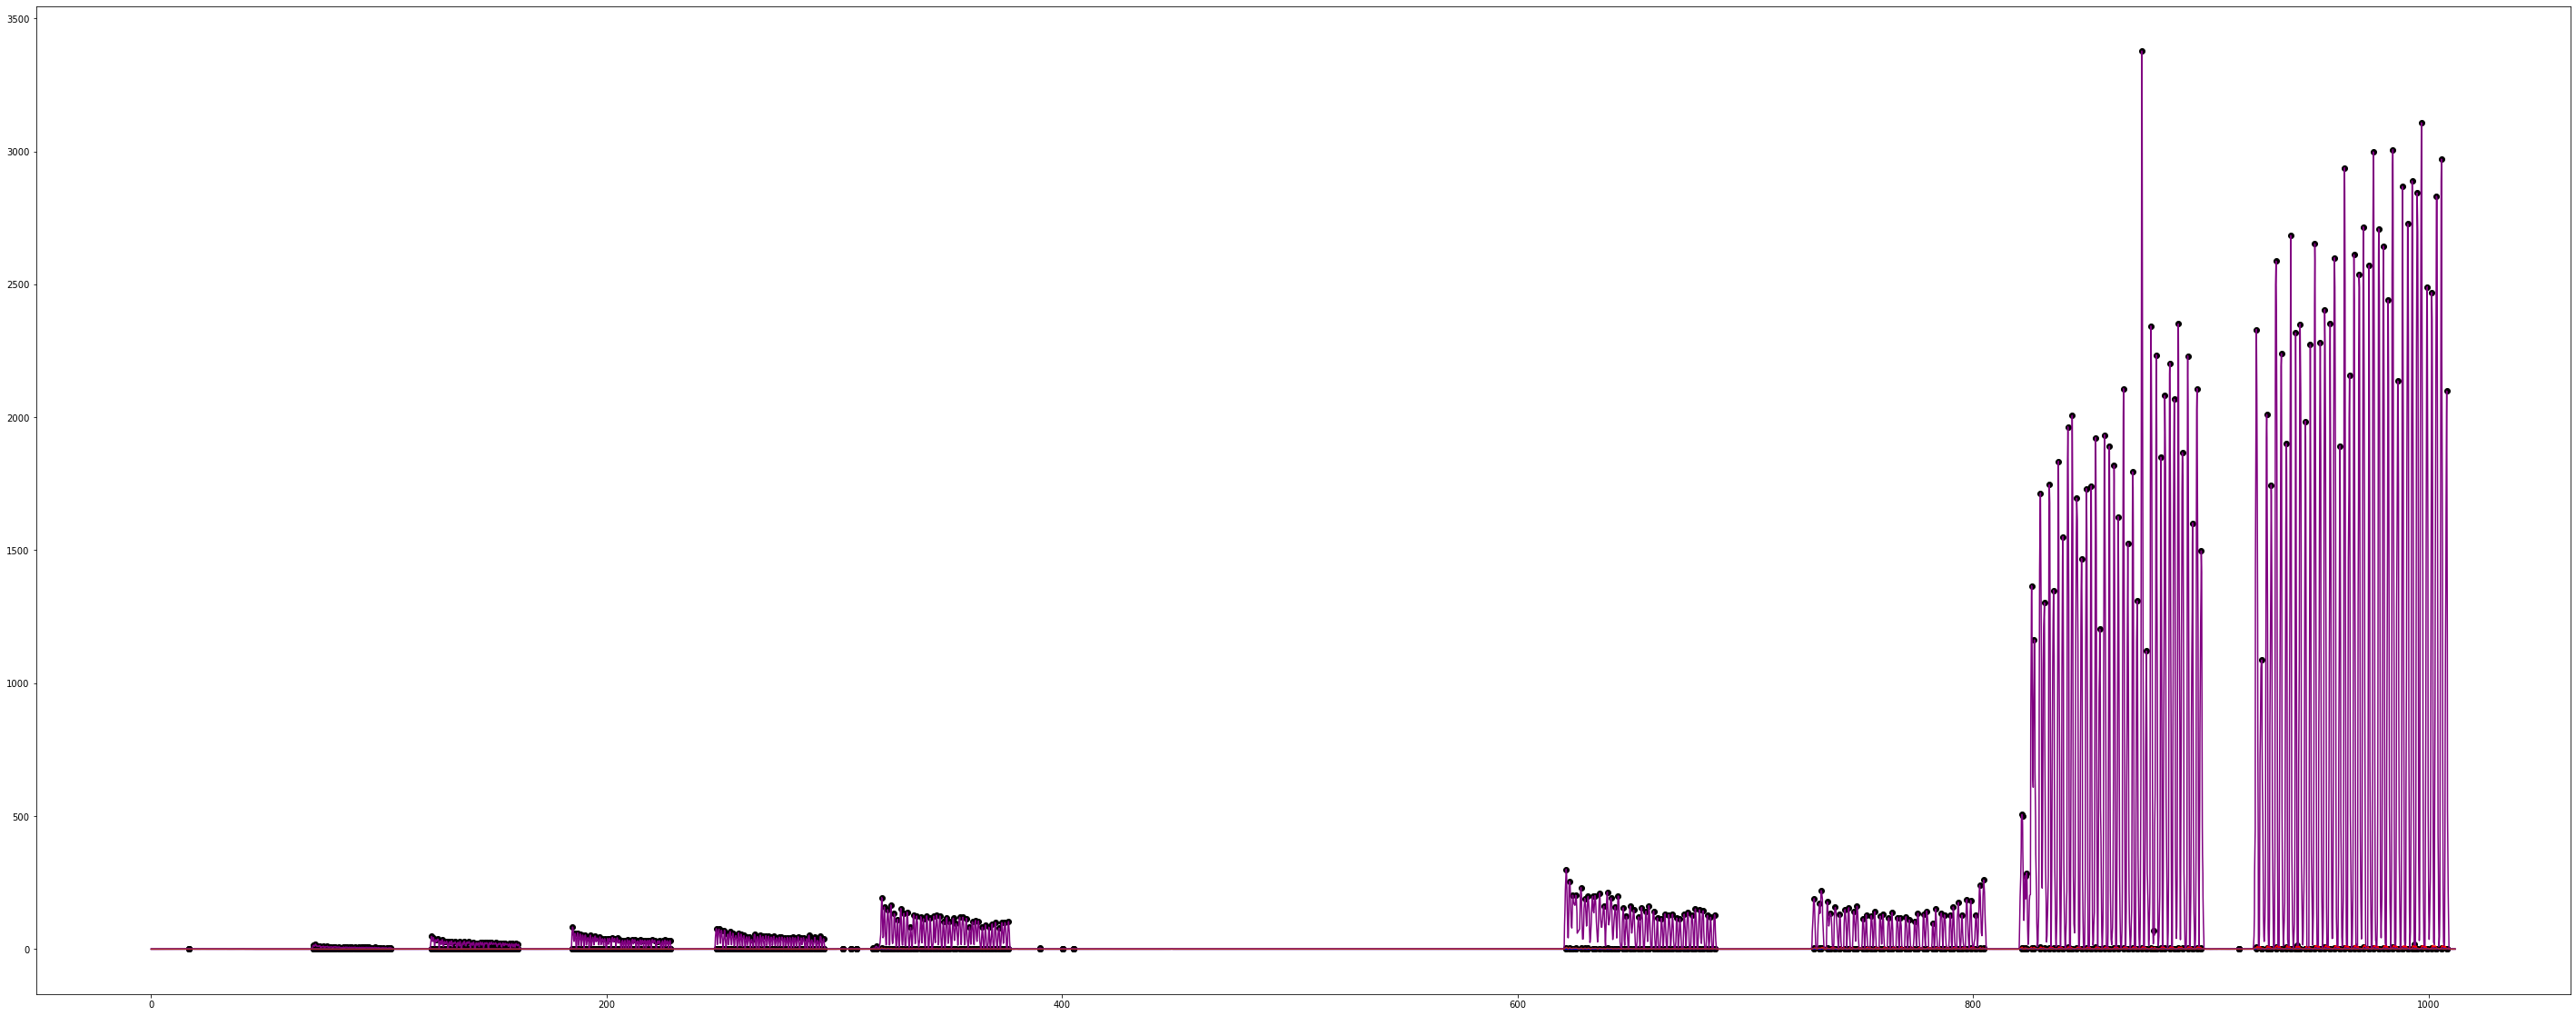

In [17]:
#finding the peaks
plt.figure(figsize=(50, 20))
Ex5_t = EX5["Unnamed: 0"]
EX5_s1 = EX5["s1_d"]
EX5_s2 = EX5["s2_d"]
EX5_s3 = EX5["s3_d"]
EX5_s4 = EX5["s4_d"]

pidx_EX5_s4, _ = find_peaks(EX5_s4,prominence = 0.7)

peaks_EX5_s4 = EX5_s4[pidx_EX5_s4]
peaks_EX5_s3 = EX5_s3[pidx_EX5_s4]
peaks_EX5_s2 = EX5_s2[pidx_EX5_s4]
peaks_EX5_s1 = EX5_s1[pidx_EX5_s4]
peaks_EX5_t = Ex5_t[pidx_EX5_s4]


plt.plot(Ex5_t,EX5_s4, color = 'purple', label = 'sesnor4')
plt.scatter(peaks_EX5_t,peaks_EX5_s4,color = 'black')
plt.plot(Ex5_t,EX5["s2_d"], color = 'red', label = 'sesnor2')
plt.scatter(peaks_EX5_t,peaks_EX5_s2,color = 'black')
plt.plot(Ex5_t,EX5["s3_d"], color = 'blue', label = 'sesnor3')
plt.scatter(peaks_EX5_t,peaks_EX5_s3,color = 'black')
plt.plot(Ex5_t,EX5["s1_d"], color = 'brown', label = 'sesnor1')
plt.scatter(peaks_EX5_t,peaks_EX5_s1,color = 'black')

In [18]:
content_Ex5 = {'R1':EX5_s1[pidx_EX5_s4],
              'R2':EX5_s2[pidx_EX5_s4],
              'R3':EX5_s3[pidx_EX5_s4],
              'R4':EX5_s4[pidx_EX5_s4], } 

df_Ex5 = pd.DataFrame(content_Ex5, columns = ['R1','R2','R3','R4'])

df_Ex5.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\Ex5.csv',index = False, header = True)